#### Multiclass classification

In the last unit, we learned about logistic regression and saw how to use it to build a binary classifier that distinguishes between two classes. We will now generalize this concept to the case where there are more than two possible classes. Such case is called a multiclass classification problem. In this unit, we will discuss two different ways to apply logistic regressions to the multiclass case.

Using softmax regression which directly generalizes logistic regressions to multiple classes.
Using the one-vs.-one (OvO) and the one-vs.-rest (OvR) strategies that convert the multiclass classification problem into several binary classifications.
Note that the second option is not specific to logistic regressions and can use any set of binary classifiers to solve a multiclass classification problem.

#### Softmax regression
Softmax regression, also known as multinomial logistic regression, is simply the generalization of the logistic regression model to multiple classes. In the binary case, we compute the probability that a point 
x
 is in the “positive” class 
y
=
1
 by transforming the output of a linear regression model 
f
(
x
)
 into a probability using the logistic function. In the multiclass case, we have one linear regression for each class, and we transform their output into probabilities using the softmax function.

p
(
y
=
i
|
x
)
=
e^
f
i
(
x
)/
∑
k
j
=
1
e^
f
j
(
x
)
In this equation, we denote the output of the linear regression for the i-th class with 
f
i
(
x
)
 and we compute the probability of being in this class by taking the exponential of this value 
e
f
i
(
x
)
 normalized by the sum of the exponential values of all the classes 
∑
k
j
=
1
e
f
j
(
x
)
 to make the probabilities sum to one.

#### One-vs.-one (OvO) strategy
It’s also possible to solve multiclass classification tasks by combining several binary classifiers. For instance, the one-vs.-one (OvO) strategy fits one binary classifier for each pair of classes and makes these classifiers vote. Let’s take an example, say that we want to use logistic regressions to solve a classification task with four categories. In this case, we will need to fit 6 logistic regressions.

Classifier 1 - class 1 vs. class 2
Classifier 2 - class 1 vs. class 3
Classifier 3 - class 1 vs. class 4
Classifier 4 - class 2 vs. class 3
Classifier 5 - class 2 vs. class 4
Classifier 6 - class 3 vs. class 4

We can then evaluate each classifier and predict the class with the maximum number of votes. For instance, say that we run each classifier from above on a new data point and get the following results.

Classifier 1 - class 2 wins
Classifier 2 - class 1 wins
Classifier 3 - class 4 wins
Classifier 4 - class 2 wins
Classifier 5 - class 2 wins
Classifier 6 - class 3 wins

In this case, we will predict class 2 because it has the most number of votes (in the case of a tie the confidence levels of the classifiers would also be used for the decision). One of the advantages of this strategy is that each classifier only involves two classes. Hence, we only need a subset of the data to fit each classifier. This might be helpful if our classifiers don’t scale well to a large number of data points.

However, the OvO strategy requires one classifier for each pair of classes. If we count the number of possible combinations, we can show that it’s equal to 
k
(
k
−
1
)
/
2
 where 
k
 is the number of classes. This number increases quadratically with 
k
 and hence doesn’t scale well to many classes. This plot shows the number of binary classifiers needed by the OvO strategy as a function of the number of classes.

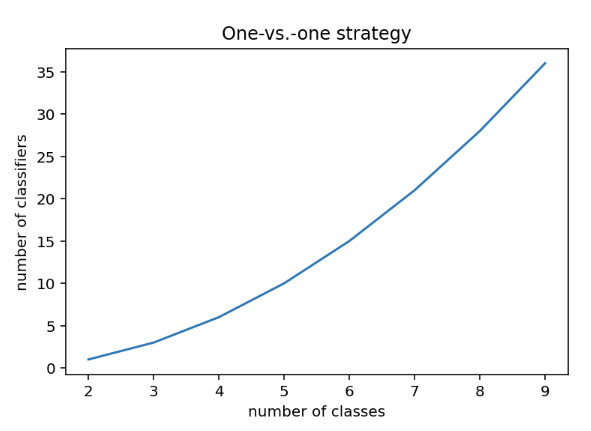

In [1]:
from IPython.display import Image
Image(filename='ovo.png')

One-vs.-rest (OvR) strategy
One solution is to use the one-vs.-rest (OvR) strategy. The idea is to fit a binary classifier that separates each class from the other ones and trust the most confident classifier. For instance, in the example from above, there are four classes, and we need to fit four binary classifiers.

* Classifier 1 - class 1 vs. other classes
* Classifier 2 - class 2 vs. other classes
* Classifier 3 - class 3 vs. other classes
* Classifier 4 - class 4 vs. other classes

Given a new data point 
x
, each classifier estimates the probability that the point belongs to its “positive” class 
p
(
y
i
=
1
|
x
)
. For instance, say that we run each classifier from above on a new data point and get the following results.

*Classifier 1 - 
p
(
y
1
=
1
|
x
)
=
0.12
*Classifier 2 - 
p
(
y
2
=
1
|
x
)
=
0.84
*Classifier 3 - 
p
(
y
3
=
1
|
x
)
=
0.16
*Classifier 4 - 
p
(
y
4
=
1
|
x
)
=
0.32

In this case, we will predict class 2 since it has the highest probability. Note that, unlike the softmax regression, the probabilities here do not necessarily sum up to one.

This strategy has many advantages compared to the OvO strategy. First, it’s computationally efficient since the number of classifiers is equal to the number of classes. The results are also easier to interpret since each category corresponds to a classifier.

#### Summary
In this unit, we saw different ways to perform multiclass classification using logistic regressions. In practice, it’s common to try both the one-vs.-rest (OvR) strategy and softmax regression, and see which one gives the best results. In the next unit, we will see how to implement both options with the LogisticRegression estimator from Scikit-learn.